## Numerical Methods: Finite Difference

### Eliptic Equation (Laplace Euation)

$ \nabla^{2} u  + c f(u) = 0 $

$\frac{\partial^{2}u}{\partial^{2}x} + \frac{\partial^{2}u}{\partial^{2}x} + cf(u) = 0$

for $c=1, fu=1$ it becomes Laplace Equation

$u_{i−1,j}+u_{i+1,j} + u_{i,j−1} + u{i,j+1} − 4u_{i,j}+cf(u_{i,j})=0$

$u_{i,j}=0;  \forall u \in ∂Ω$



In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
from scipy.sparse import coo_matrix
import seaborn as sns
sns.set()

In [210]:
n = 100
c = 1

In [211]:
def f(u):
    return u**3

def f_prime(u):
    return 3 * u**2

In [212]:
def fun(u, n,f, f_prime,c, **kwargs):
    v = np.zeros((n + 2, n + 2))
    
    
    #buttom value = 1
    #v[n+1,:] = 1
    # top value = 1
    #v[0,:] = 1
    # center value = 1
    #v[int(n/2),int(n/2)] = 1
    
    
    u = u.reshape((n, n))
    v[1:-1, 1:-1] = u
    y = v[:-2, 1:-1] + v[2:, 1:-1] + v[1:-1, :-2] + v[1:-1, 2:] - 4 * u + c * f(u)
    return y.ravel()

In [213]:
def compute_jac_indices(n):
    i = np.arange(n)
    jj, ii = np.meshgrid(i, i)

    ii = ii.ravel()
    jj = jj.ravel()

    ij = np.arange(n**2)

    jac_rows = [ij]
    jac_cols = [ij]

    mask = ii > 0
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask - n)

    mask = ii < n - 1
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask + n)

    mask = jj > 0
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask - 1)

    mask = jj < n - 1
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask + 1)

    return np.hstack(jac_rows), np.hstack(jac_cols)


In [214]:
jac_rows, jac_cols = compute_jac_indices(n)

In [215]:
def jac(u, n,f, f_prime,c, jac_rows=None, jac_cols=None):
    jac_values = np.ones_like(jac_cols, dtype=float)
    jac_values[:n**2] = -4 +  c * f_prime(u)
    return coo_matrix((jac_values, (jac_rows, jac_cols)), shape=(n**2, n**2))


In [216]:
u0 = np.ones(n**2) * 0.5

In [217]:
jac_rows, jac_cols = compute_jac_indices(n)

In [218]:
res_1 = least_squares(fun, u0, jac=jac, gtol=1e-3, args=(n,f, f_prime,c),\
                      kwargs={'jac_rows': jac_rows, 'jac_cols': jac_cols}, verbose=1)

`gtol` termination condition is satisfied.
Function evaluations 111, initial cost 1.0412e+02, final cost 2.8469e-03, first-order optimality 3.99e-04.


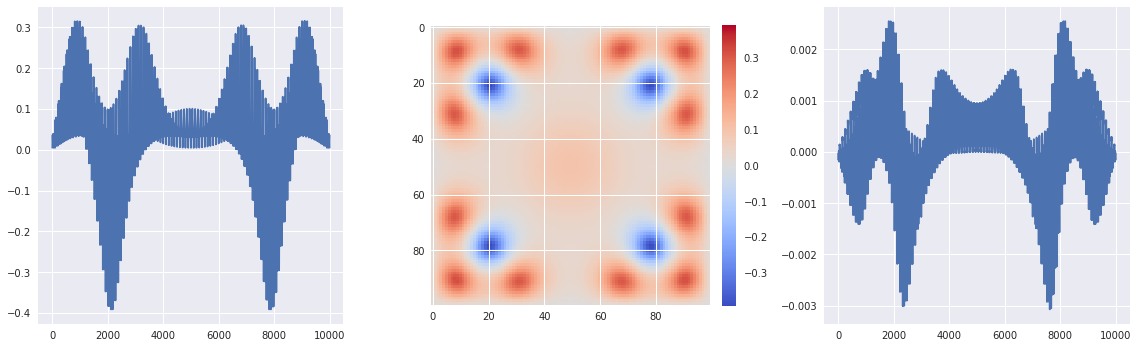

In [219]:
plt.figure(figsize=(16, 5))
plt.subplot(132)
plt.imshow(res_1.x.reshape((n, n)), cmap='coolwarm', vmin=-max(abs(res_1.x)), vmax=max(abs(res_1.x)))
plt.colorbar(use_gridspec=True, fraction=0.046, pad=0.04)
plt.subplot(131)
plt.plot(res_1.x)
plt.subplot(133)
plt.plot(res_1.fun)
plt.tight_layout()